In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

from scipy import stats as stats

In [2]:
# Importing the packages and Functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

from sklearn.model_selection import train_test_split
# import sklearn.model_selection.train_test_split as train_test_split

import statsmodels.formula.api as smf # Optimization of straight line
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF Selection
from patsy import dmatrices # Dependency for VIF

In [3]:
# 1. Perform below analysis								
# 		a. Data Audit: Calculate Below metrics (Weightage - 10%)						
# 			1. Number of rows & Number of columns					
# 			2. Number of numerical & categorical columns					
# 			3. Any other observations from the data in terms of cleaning, preparation required?					
# 			4.  Detailed EDA - Univariate & Bi Variate analysis for each variable (distributions)					
# 			5. Find out data related issues based on the data Audit					

In [4]:
inventory_stock_data = pd.read_csv(r'C:\Users\sairam\Downloads\analytics lab\case studies\term 2.1 python for analytics\Integrated Case Study - Python latest\Inventory_Stock_Data.csv')
sales_shipment_data = pd.read_csv(r'C:\Users\sairam\Downloads\analytics lab\case studies\term 2.1 python for analytics\Integrated Case Study - Python latest\Sales_Shipment_Data.csv')

### DATA AUDIT 

#### 1. Number of rows & Number of columns

In [5]:
print(f'Inventory Stock Data Shape: {inventory_stock_data.shape}')
print(f'Sales Shipment Data Shape: {sales_shipment_data.shape}')


Inventory Stock Data Shape: (118, 11)
Sales Shipment Data Shape: (180519, 46)


#### 2. Number of numerical & categorical columns

In [6]:
print(inventory_stock_data.select_dtypes(include = "object").shape)
print(inventory_stock_data.select_dtypes(exclude = "object").shape)

(118, 2)
(118, 9)


In [7]:
print(sales_shipment_data.select_dtypes(include = "object").shape)
print(sales_shipment_data.select_dtypes(exclude = "object").shape)

(180519, 22)
(180519, 24)


#### 		3. Any other observations from the data in terms of cleaning, preparation required?					


In [8]:
# 1) we have to check id dtypes are correct or not 
# 2) check for null values 
# 3) duplicate values
# 4) to check if there are outlier present or not 

#### 		4.  Detailed EDA - Univariate & Bi Variate analysis for each variable (distributions)					


#### univariate

In [9]:
final_data = sales_shipment_data.merge(inventory_stock_data,left_on='Product Id',right_on='product id',how = 'left')

In [10]:
final_obj = final_data.select_dtypes(include='object')
final_int = final_data.select_dtypes(exclude='object')

In [11]:
final_obj.nunique()

Category Name                    50
Class                             3
Customer City                   563
Customer Country                  2
Customer Fname                  782
Customer Lname                 1109
Customer Segment                  3
Customer State                   46
Customer Street                6953
Delivery Status                   4
Department Name                  11
Market                            5
Order City                     3597
Order Country                   164
order date (DateOrders)       65752
Order Region                     23
Order State                    1089
Order Status                      9
Product Name                    118
shipping date (DateOrders)    63701
Shipping Mode                     4
Type                              4
order-now                         2
product name                    118
dtype: int64

In [12]:
obj_col = final_obj.loc[:, final_obj.nunique()<100].columns
obj_col

Index(['Category Name', 'Class', 'Customer Country', 'Customer Segment',
       'Customer State', 'Delivery Status', 'Department Name', 'Market',
       'Order Region', 'Order Status', 'Shipping Mode', 'Type', 'order-now'],
      dtype='object')

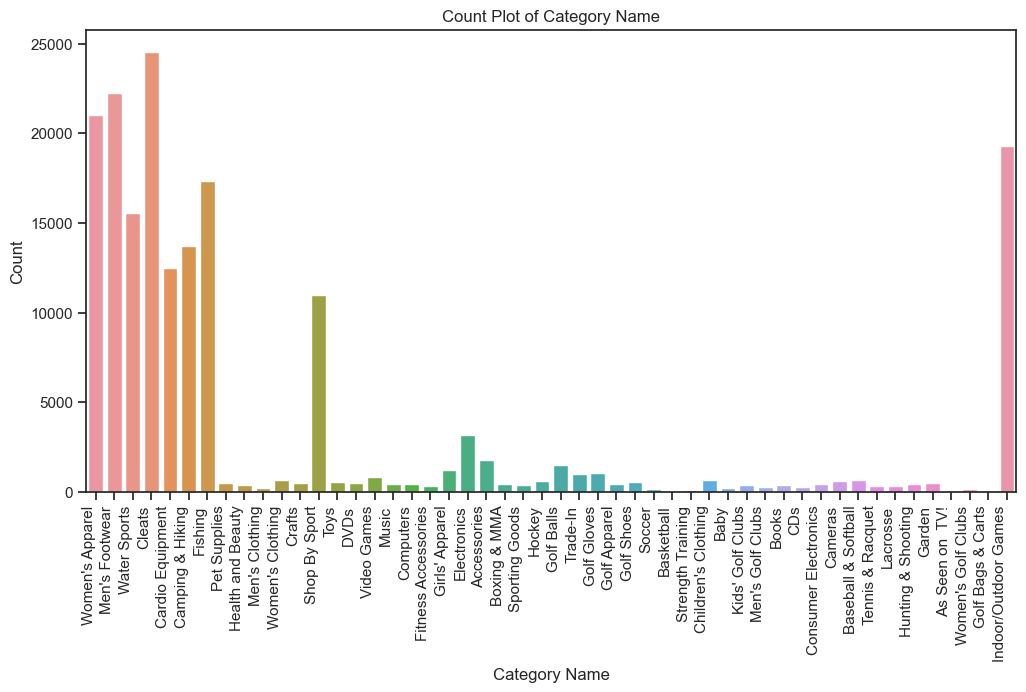

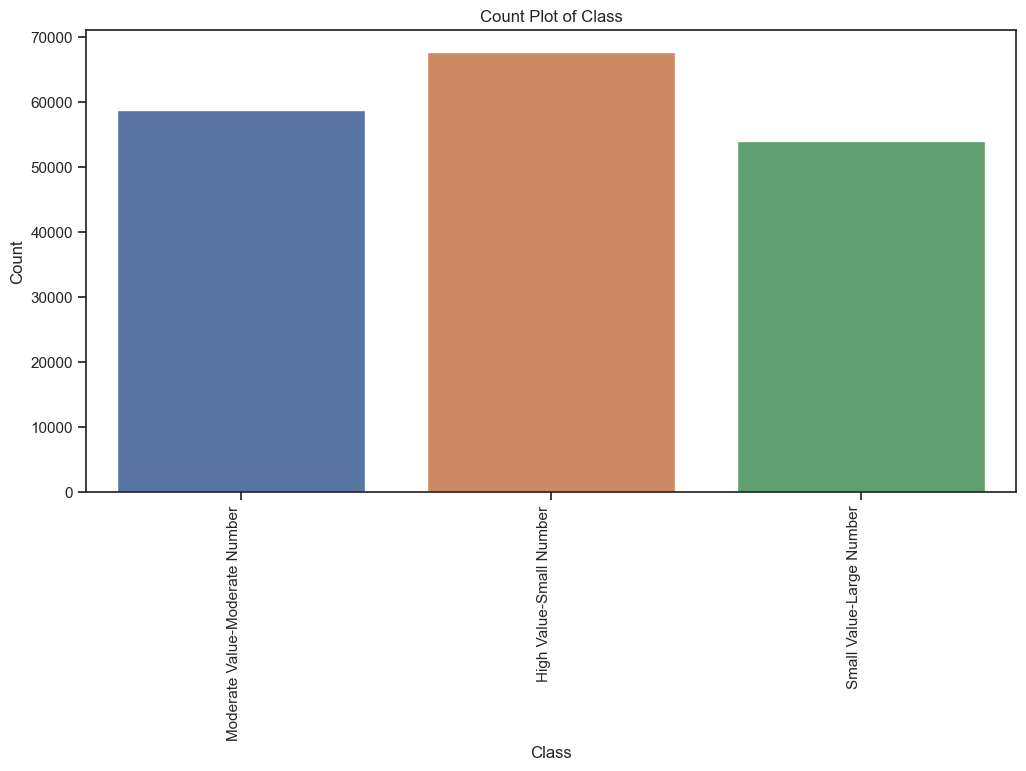

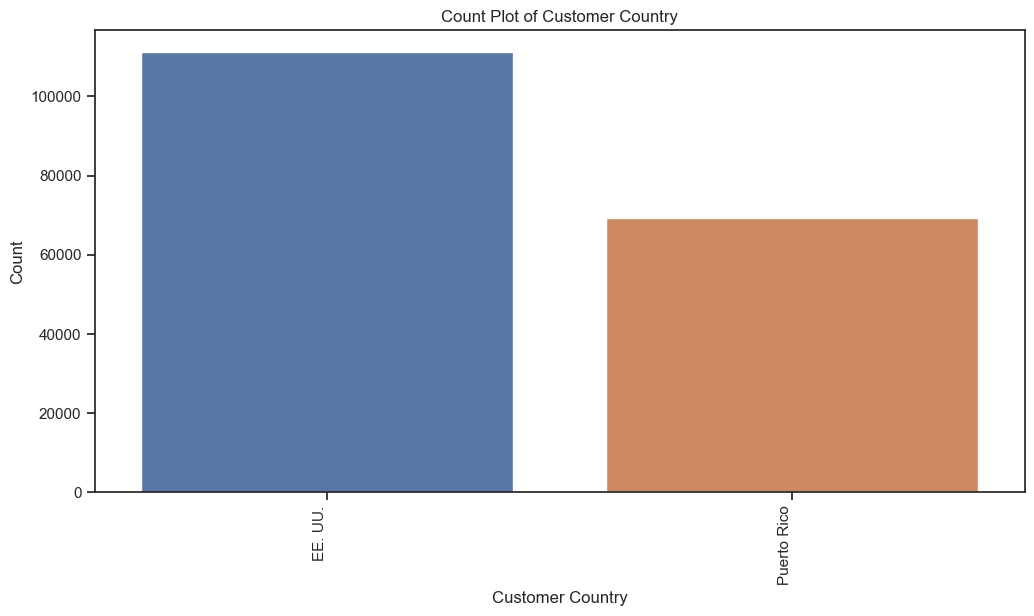

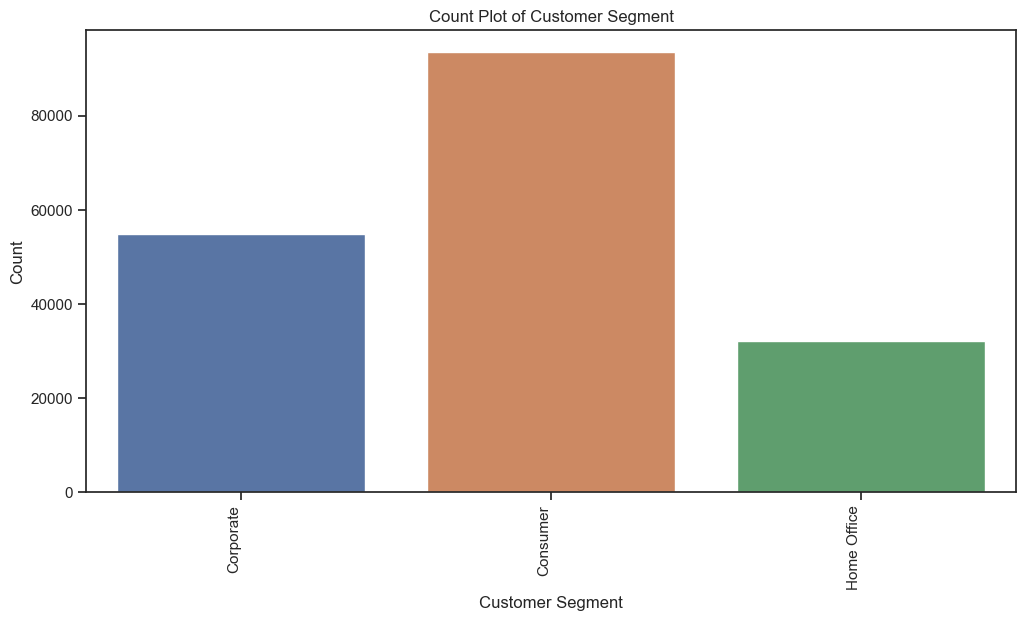

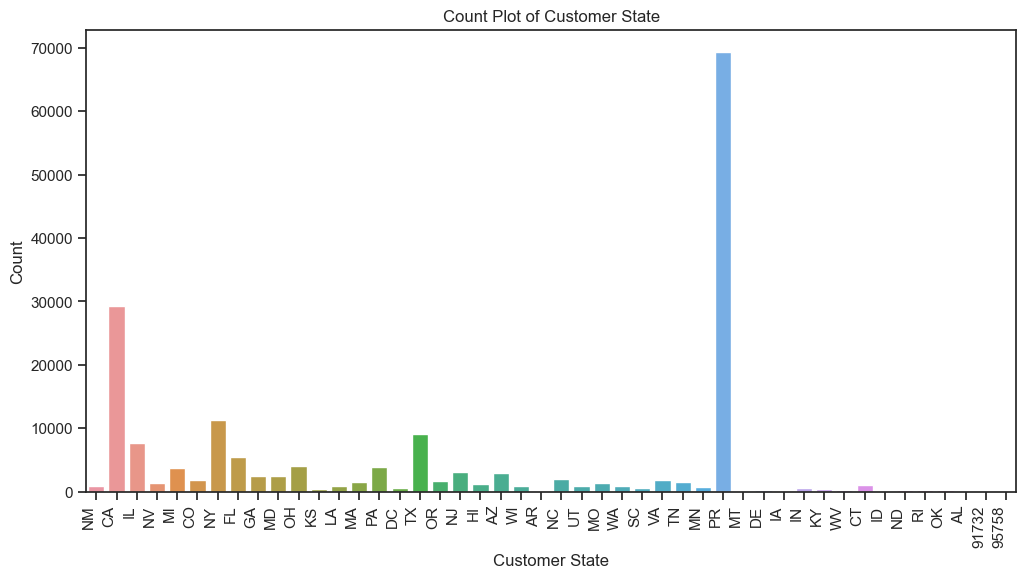

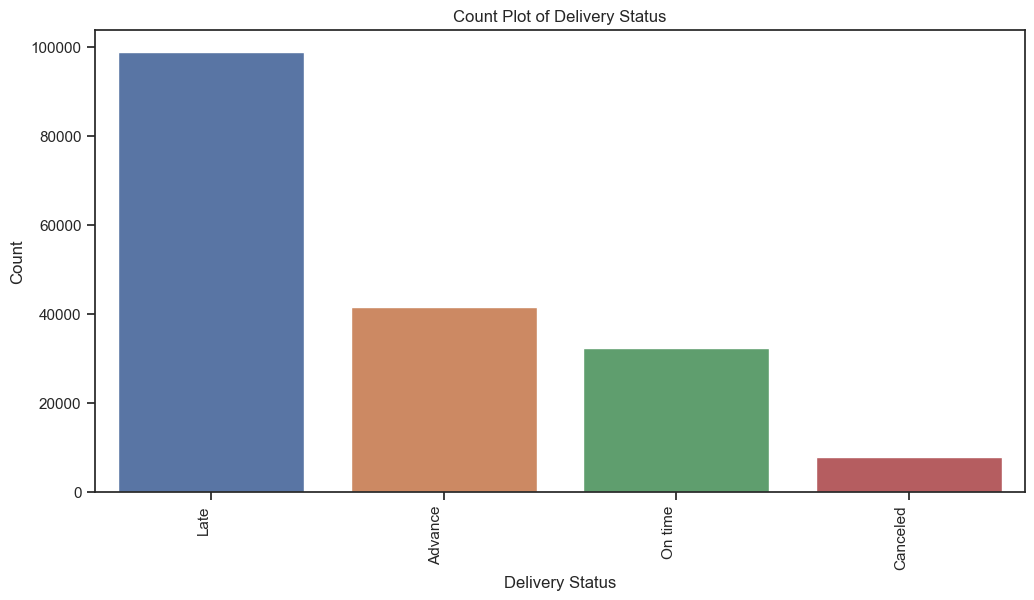

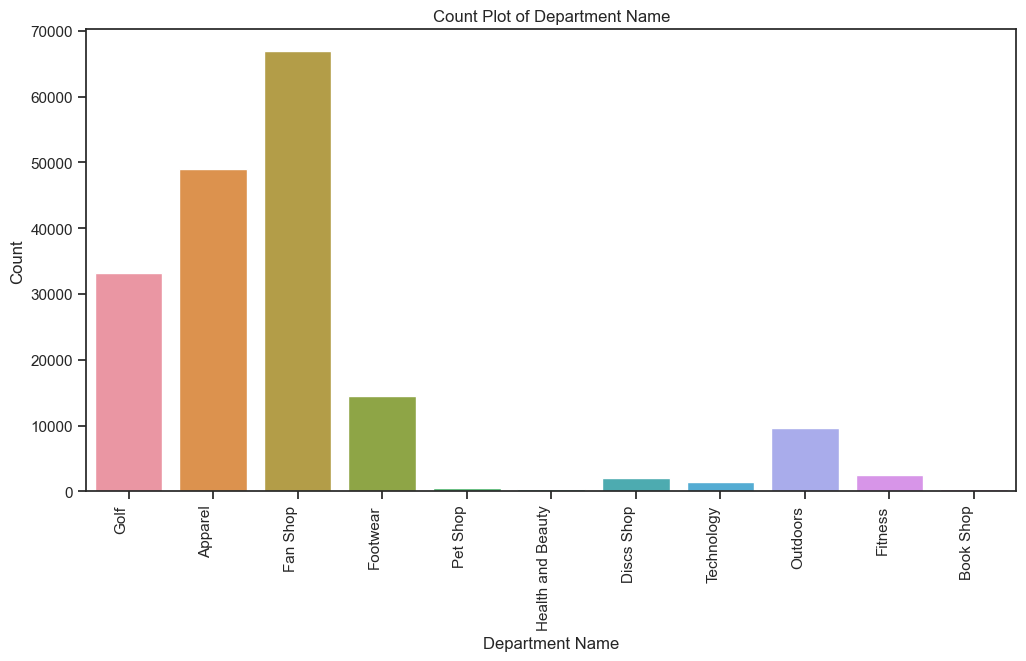

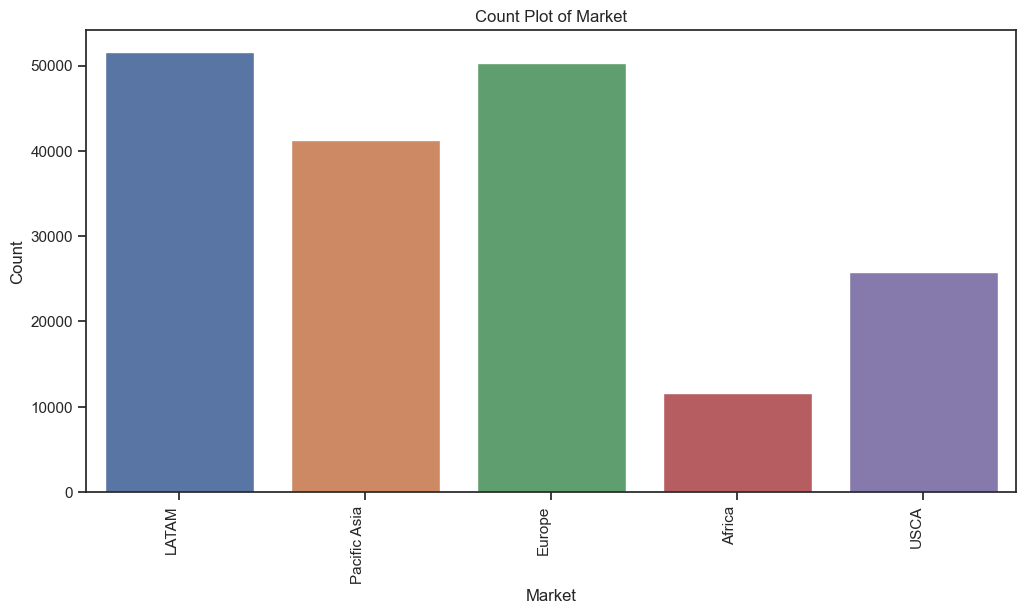

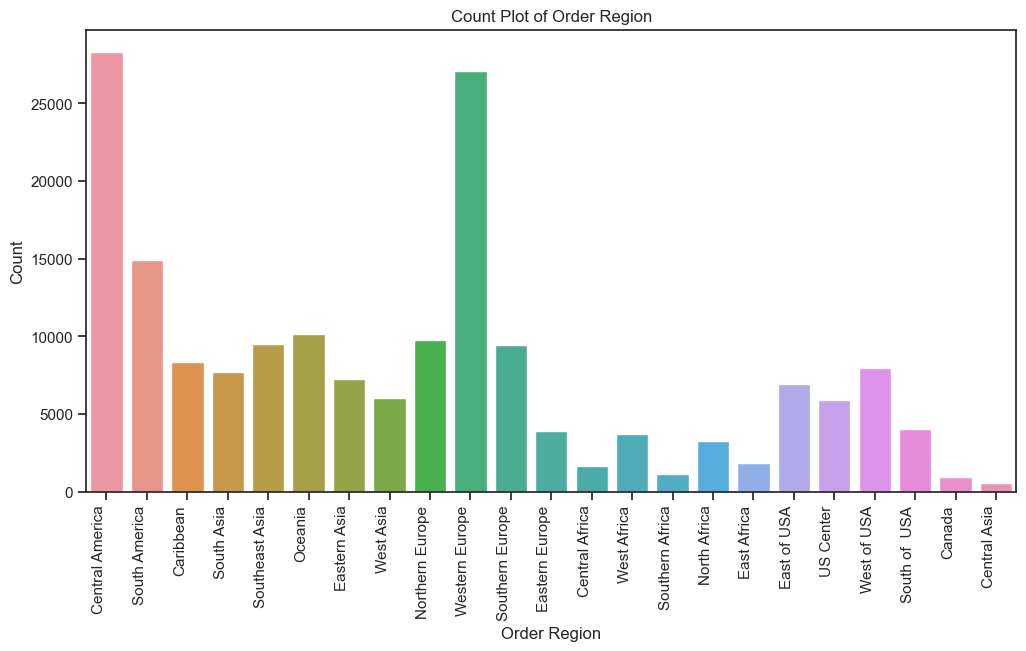

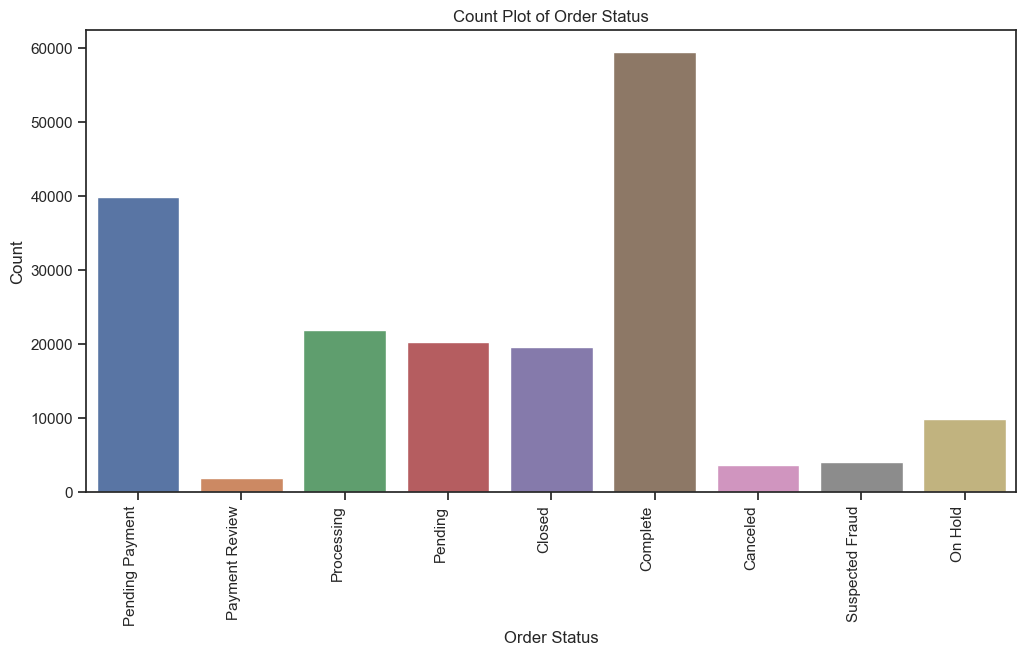

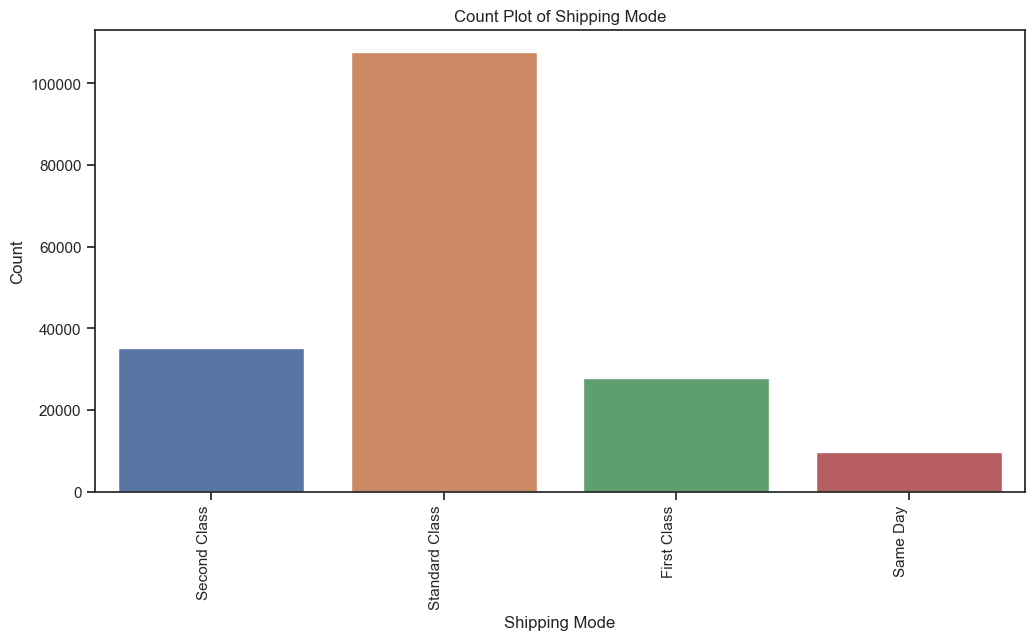

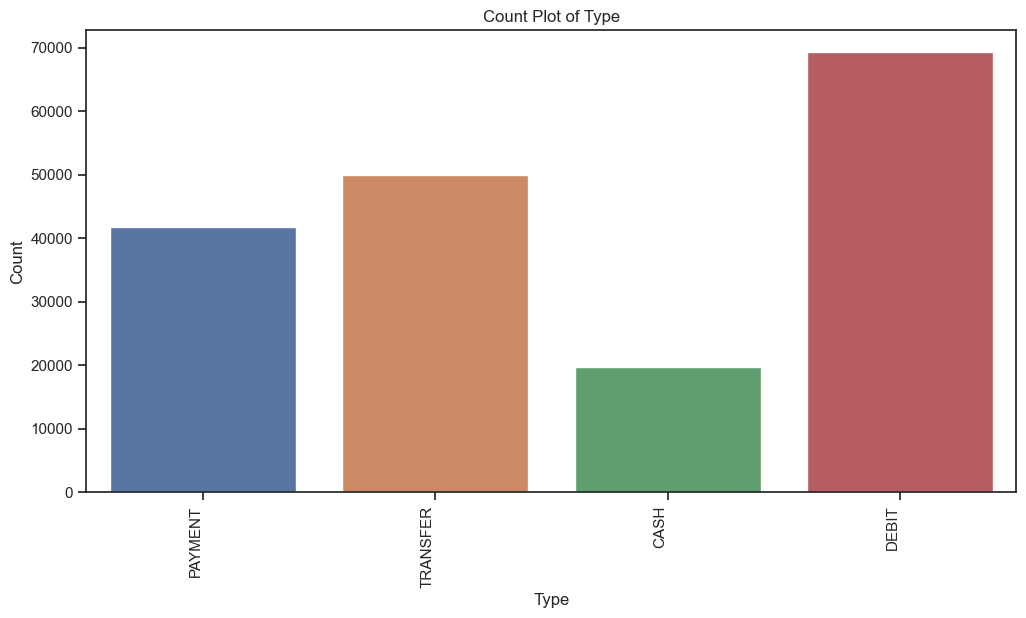

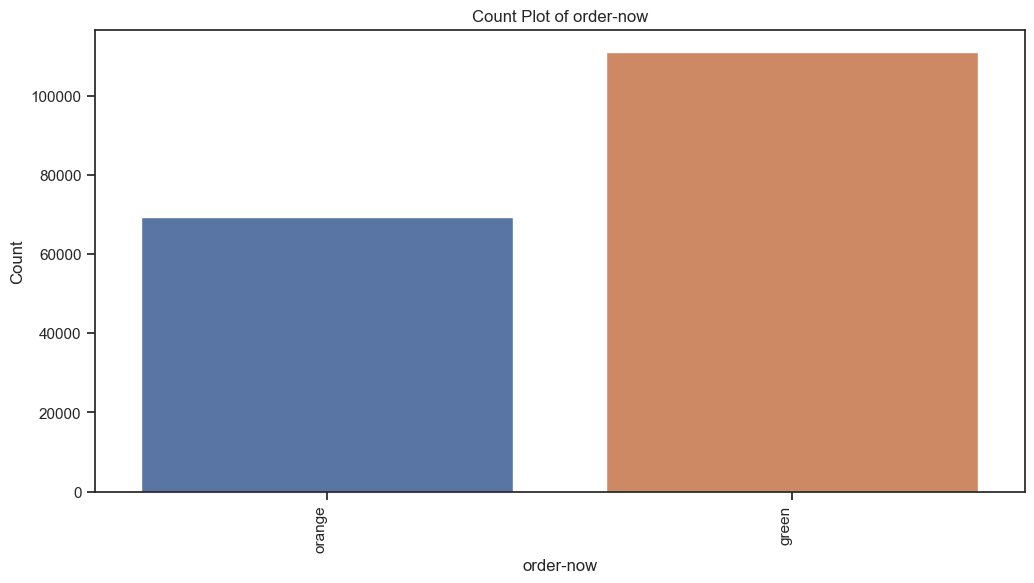

In [13]:
for i in obj_col:
    plt.figure(figsize=(12, 6)) 
    sns.countplot(x = final_data[i])
    plt.xticks(rotation=90, ha='right') 
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {i}')


In [14]:
final_int.nunique()

Product Category Id                  51
Customer Id                       20652
Customer Zipcode                    995
Department Id                        11
Order Id                          65752
Product Id                          118
Benefit per order                 21998
Days for shipment (scheduled)         4
Days for shipping (real)              7
Latitude                          11250
Longitude                          4487
Order Customer Id                 20652
Order Item Cardprod Id              118
Order Item Discount                1017
Order Item Discount Rate             18
Order Item Id                    180519
Order Item Product Price             75
Order Item Profit Ratio             162
Order Item Quantity                   5
Order Item Total                   2927
Order Profit Per Order            21998
Product Price                        75
Sales                               193
Sales per customer                 2927
product id                          118


In [15]:
col_int = final_int.loc[:, final_int.nunique()<100].columns
col_int

Index(['Product Category Id', 'Department Id', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Product Price',
       'avg lead time', 'avg order qty', 'current stock', 'max lead time',
       'max order qty', 'mod', 'reorder point', 'safety stock'],
      dtype='object')

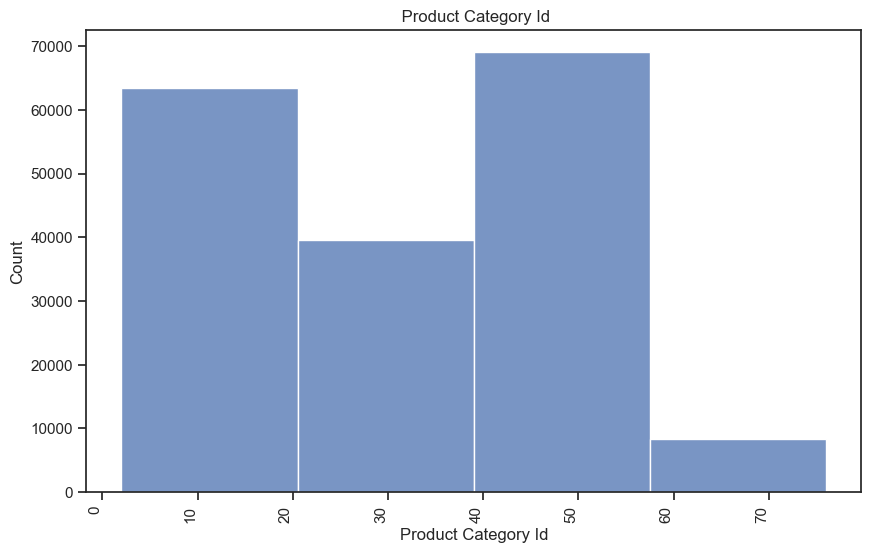

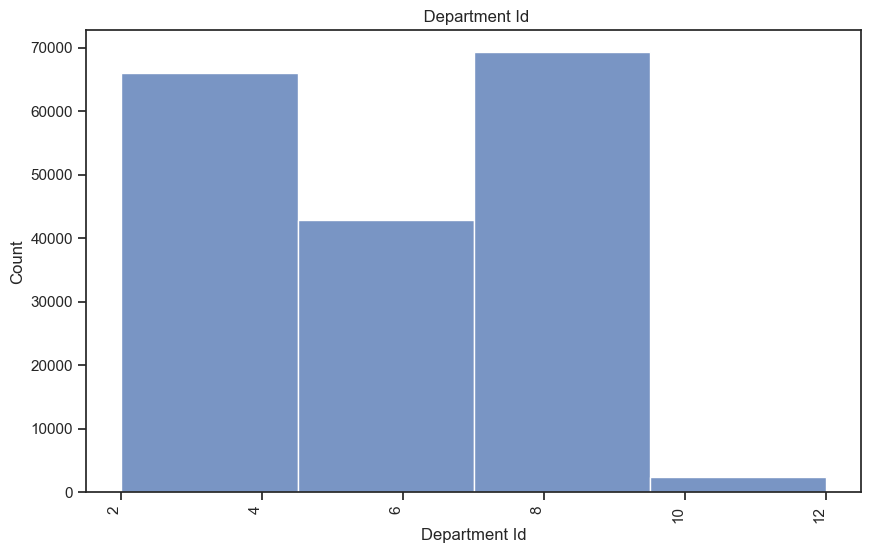

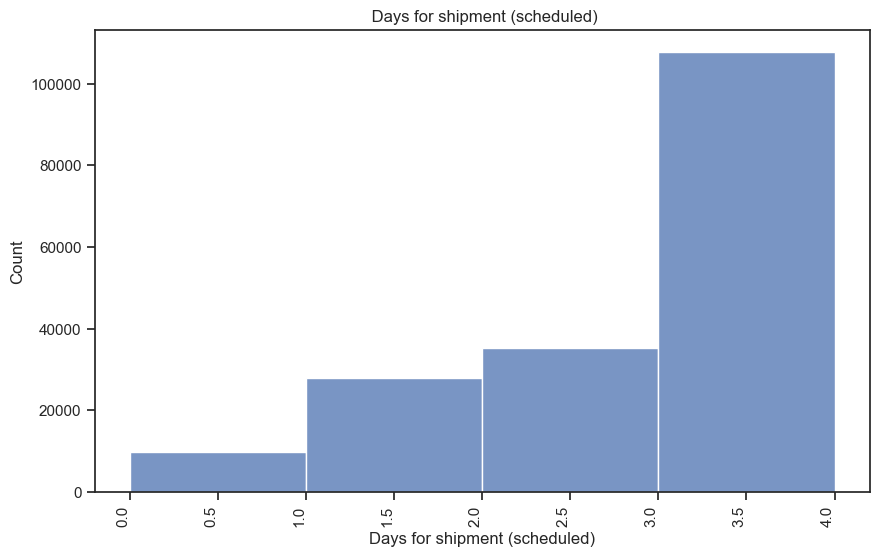

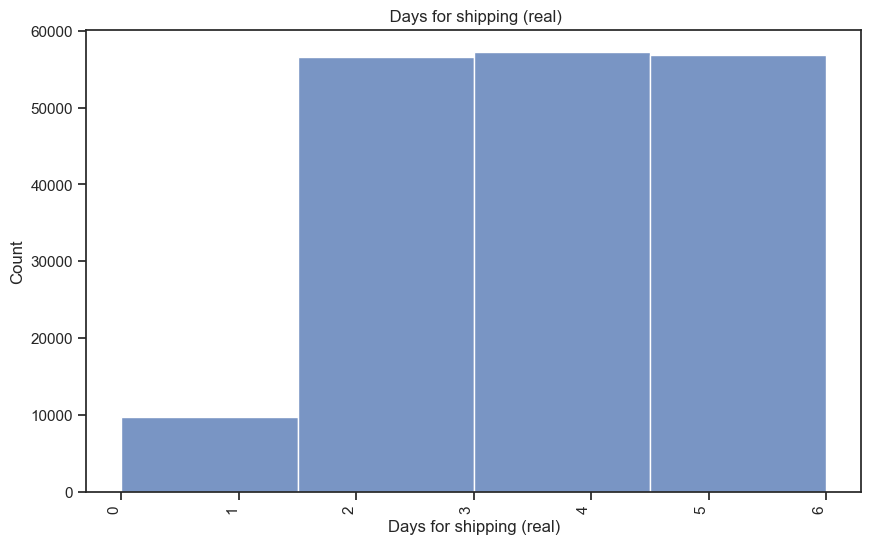

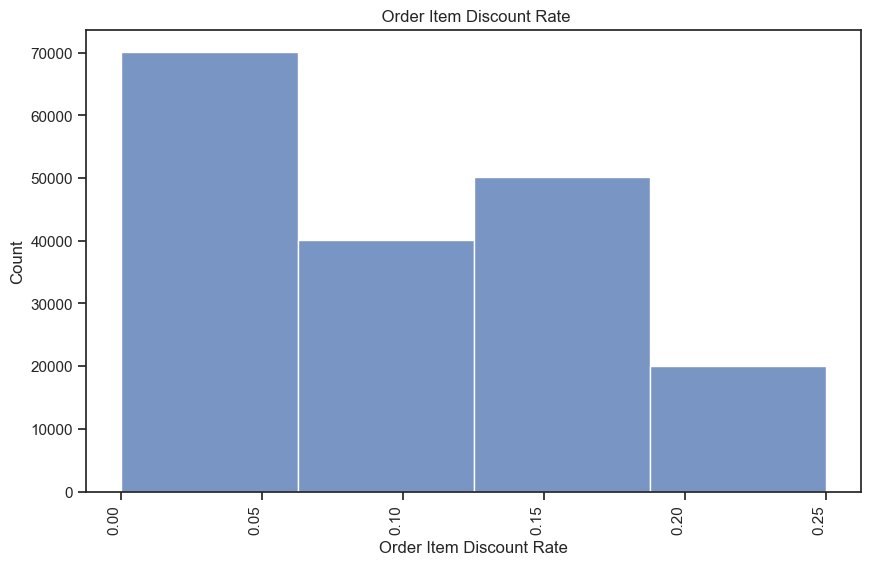

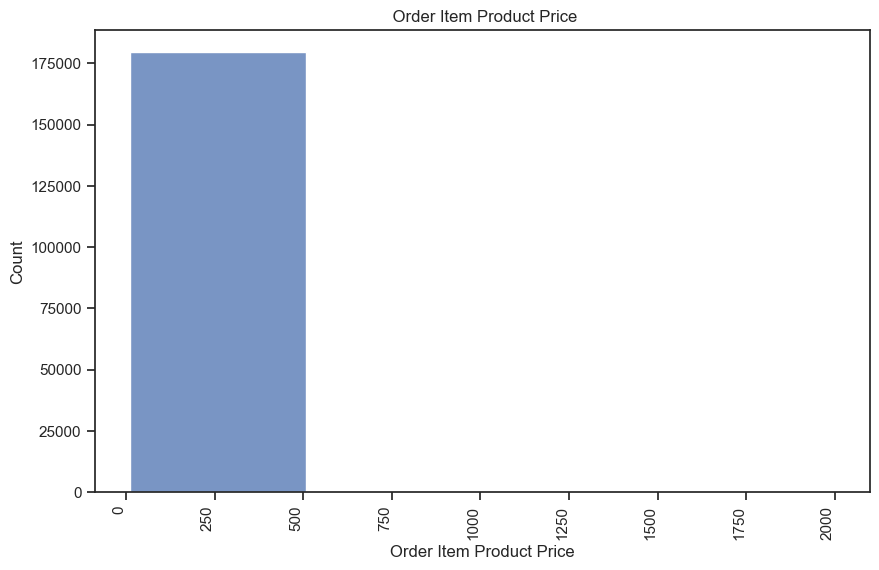

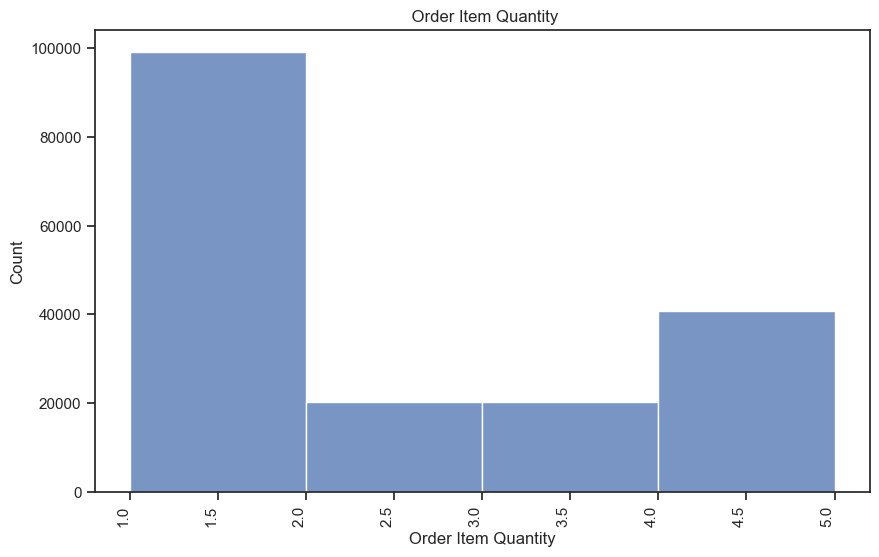

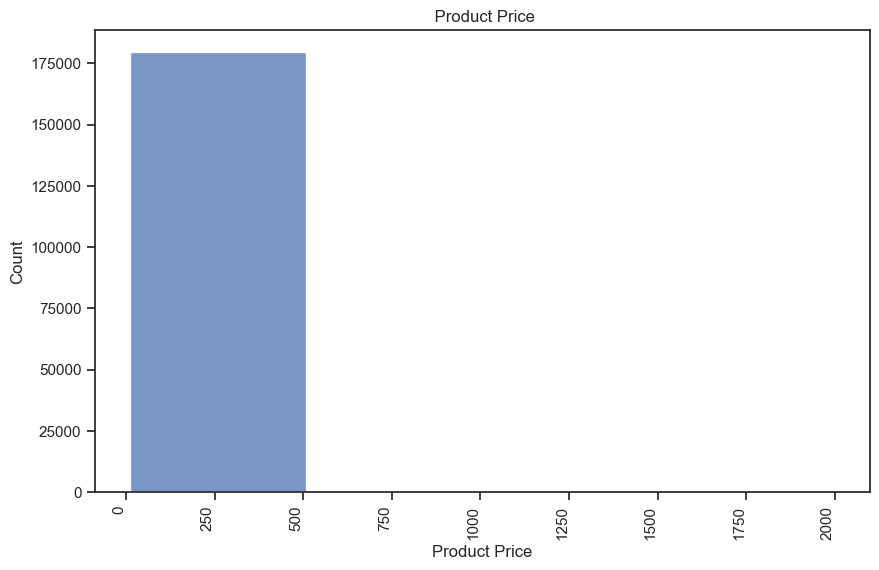

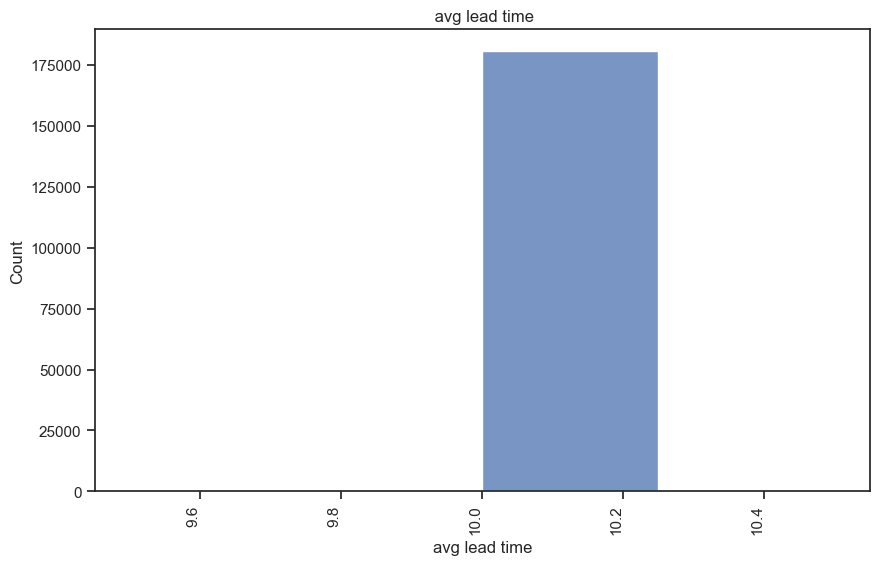

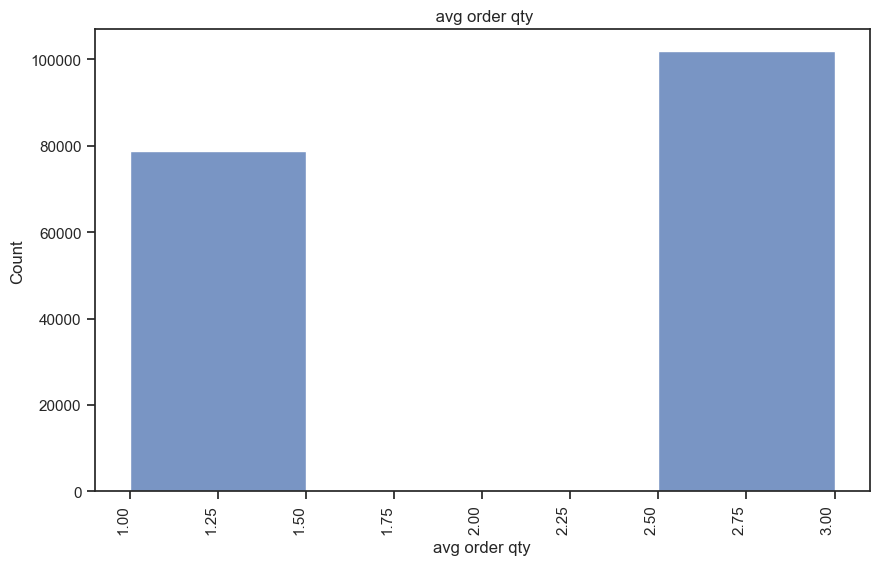

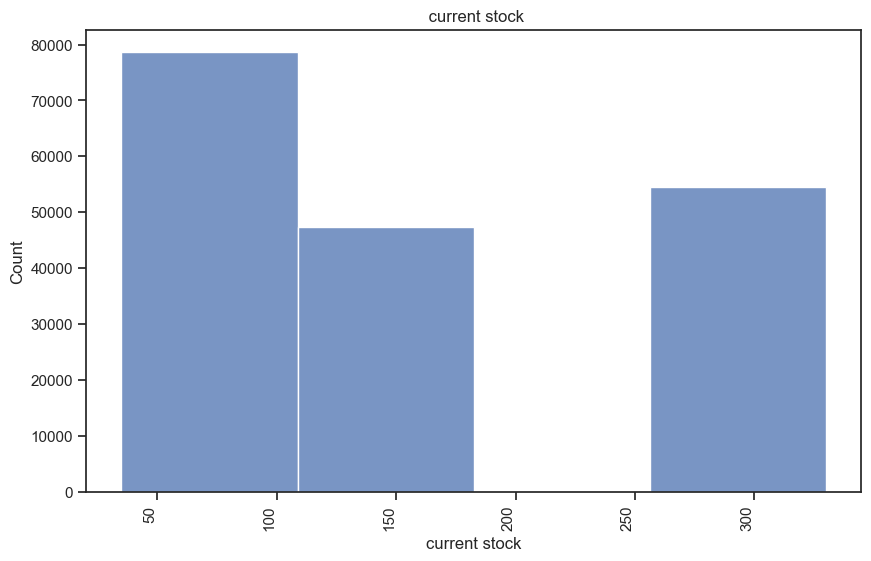

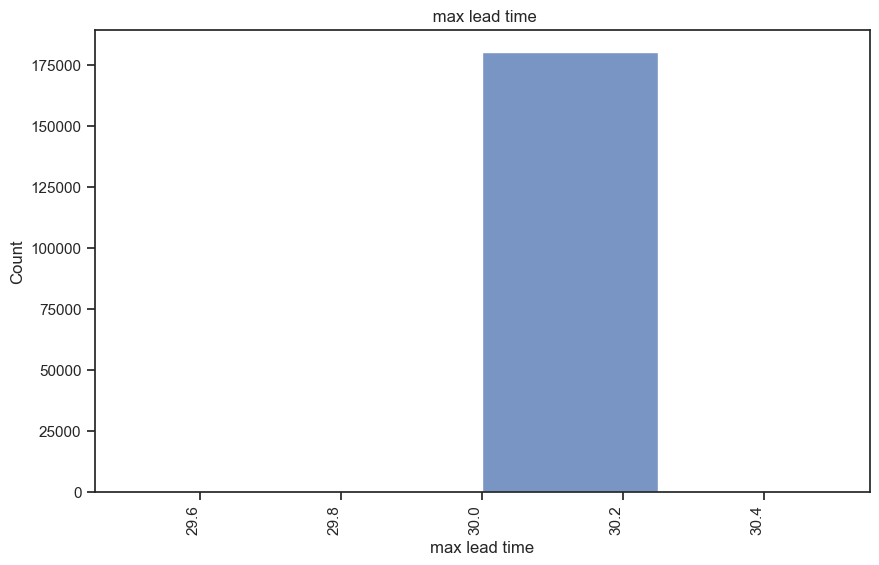

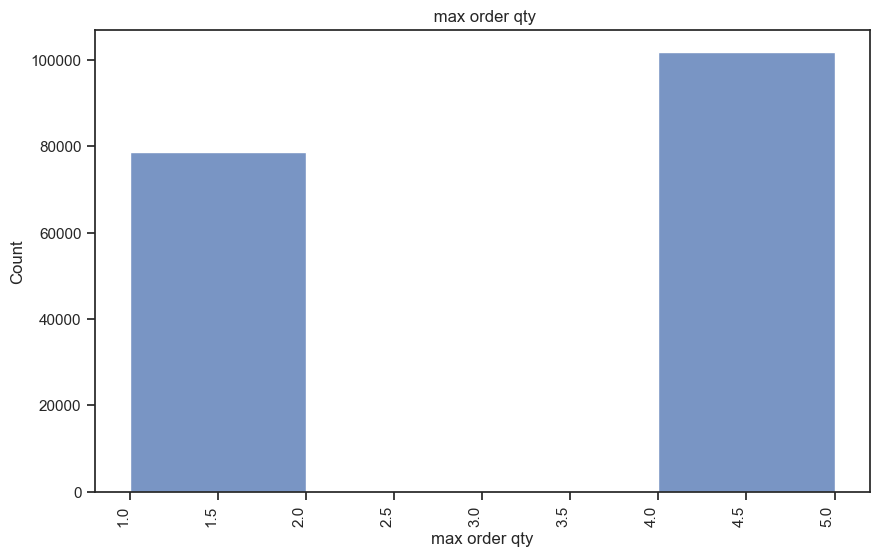

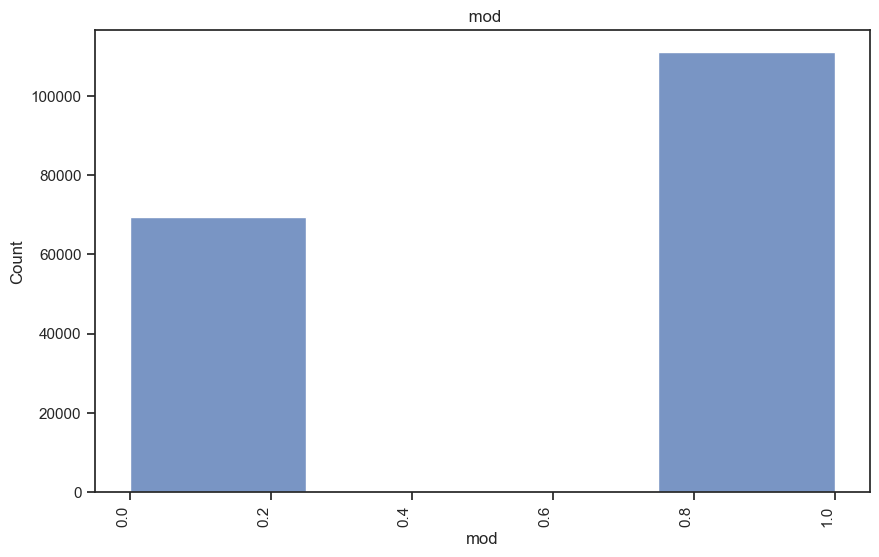

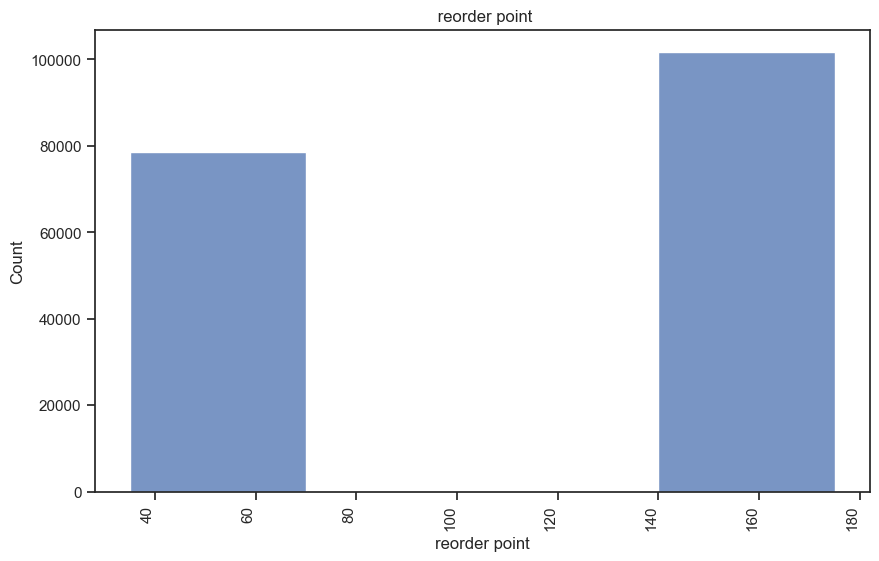

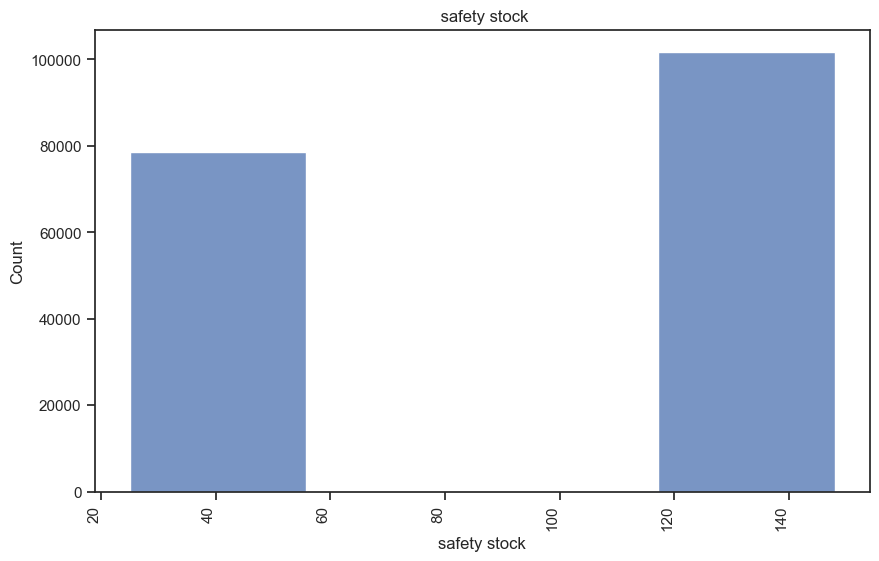

In [16]:
for i in col_int:
    plt.figure(figsize=(10, 6))  
    sns.histplot(final_int[i], bins=4)
    plt.xticks(rotation=90, ha='right') 
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f' {i}')


#### bivariate 

In [17]:
# obj vs obj
pd.crosstab(final_data['Order Region'],final_data['Order Status'])

Order Status,Canceled,Closed,Complete,On Hold,Payment Review,Pending,Pending Payment,Processing,Suspected Fraud
Order Region,,,,,,,,,
Canada,23,130,280,31,1,119,204,142,29
Caribbean,177,919,2694,407,88,980,1786,1077,190
Central Africa,33,200,587,72,20,188,326,223,28
Central America,536,3141,9271,1533,305,3305,6044,3575,631
Central Asia,5,82,186,31,2,54,117,70,6
East Africa,40,159,632,105,18,213,450,204,31
East of USA,148,830,2406,370,74,723,1417,797,150
Eastern Asia,151,800,2268,366,91,870,1697,881,156
Eastern Europe,61,456,1355,222,38,441,806,467,74


In [18]:
# int vs int 
final_int.corr()

,Product Category Id,Customer Id,Customer Zipcode,Department Id,Order Id,Product Id,Benefit per order,Days for shipment (scheduled),Days for shipping (real),Latitude,...,Sales per customer,product id,avg lead time,avg order qty,current stock,max lead time,max order qty,mod,reorder point,safety stock
Product Category Id,1.000000,0.274633,0.002898,0.888835,0.198496,0.991092,0.031889,-0.000367,-0.000348,0.002195,...,0.225201,0.991092,NaN,-0.442592,-0.564729,NaN,-0.442592,-0.325766,-0.442592,-0.440449
Customer Id,0.274633,1.000000,0.002022,0.136897,0.204821,0.228039,0.009354,0.000899,0.003432,0.002335,...,0.060181,0.228039,NaN,-0.132305,-0.120804,NaN,-0.132305,-0.028900,-0.132305,-0.132310
Customer Zipcode,0.002898,0.002022,1.000000,0.002878,-0.001210,0.003173,0.002235,-0.003019,0.000112,0.584553,...,-0.001304,0.003173,NaN,-0.002784,-0.002422,NaN,-0.002784,0.000524,-0.002784,-0.002771
Department Id,0.888835,0.136897,0.002878,1.000000,0.106757,0.906117,0.031442,-0.000262,-0.001631,0.002460,...,0.232367,0.906117,NaN,-0.388464,-0.538323,NaN,-0.388464,-0.370084,-0.388464,-0.386223
Order Id,0.198496,0.204821,-0.001210,0.106757,1.000000,0.163416,0.013716,-0.001878,-0.001711,-0.002984,...,0.079000,0.163416,NaN,-0.128550,-0.116675,NaN,-0.128550,-0.016869,-0.128550,-0.128619
Product Id,0.991092,0.228039,0.003173,0.906117,0.163416,1.000000,0.033161,-0.000431,-0.000859,0.002031,...,0.236367,1.000000,NaN,-0.457387,-0.579168,NaN,-0.457387,-0.323294,-0.457387,-0.455202
Benefit per order,0.031889,0.009354,0.002235,0.031442,0.013716,0.033161,1.000000,-0.000185,-0.005101,0.000338,...,0.133484,0.033161,NaN,-0.041921,-0.033077,NaN,-0.041921,-0.009363,-0.041921,-0.042095
Days for shipment (scheduled),-0.000367,0.000899,-0.003019,-0.000262,-0.001878,-0.000431,-0.000185,1.000000,0.515880,-0.005300,...,0.006445,-0.000431,NaN,-0.002652,-0.002564,NaN,-0.002652,-0.001835,-0.002652,-0.002659
Days for shipping (real),-0.000348,0.003432,0.000112,-0.001631,-0.001711,-0.000859,-0.005101,0.515880,1.000000,-0.004073,...,0.001757,-0.000859,NaN,0.000026,0.001472,NaN,0.000026,0.001077,0.000026,0.000006
Latitude,0.002195,0.002335,0.584553,0.002460,-0.002984,0.002031,0.000338,-0.005300,-0.004073,1.000000,...,-0.000223,0.002031,NaN,0.000775,0.000611,NaN,0.000775,0.000176,0.000775,0.000781


In [19]:
# obj vs int
x_axis_col = final_obj.loc[:,final_obj.nunique()<10].columns
x_axis_col

Index(['Class', 'Customer Country', 'Customer Segment', 'Delivery Status',
       'Market', 'Order Status', 'Shipping Mode', 'Type', 'order-now'],
      dtype='object')

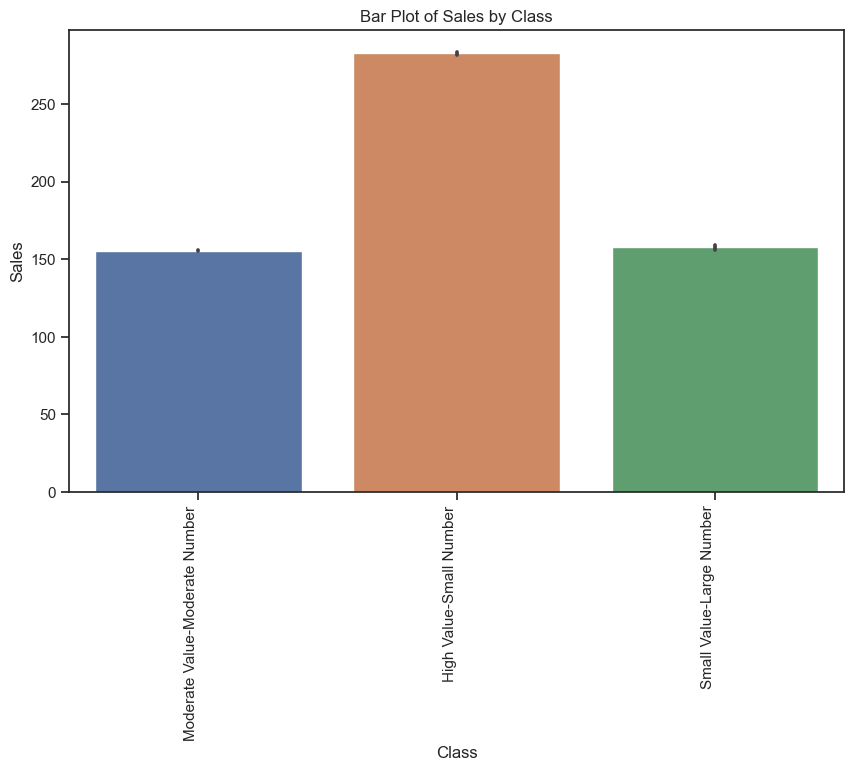

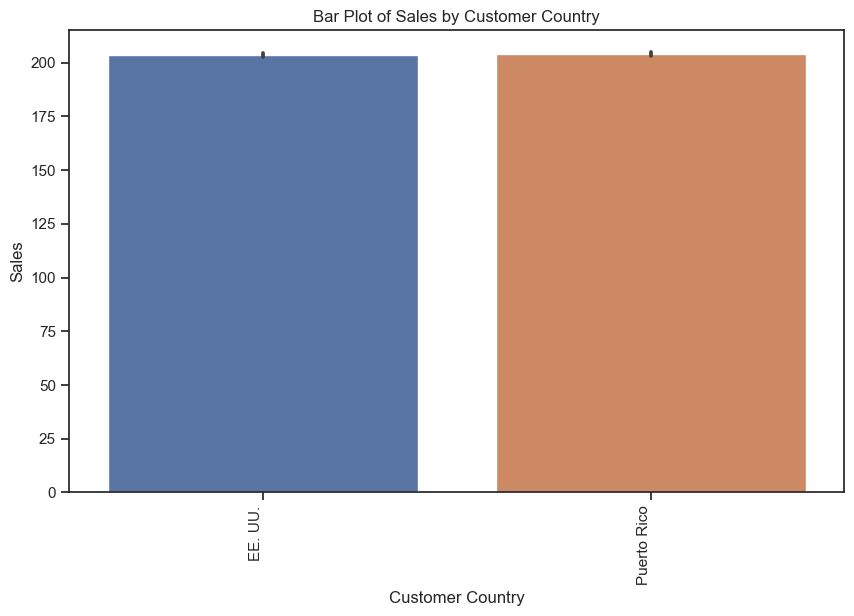

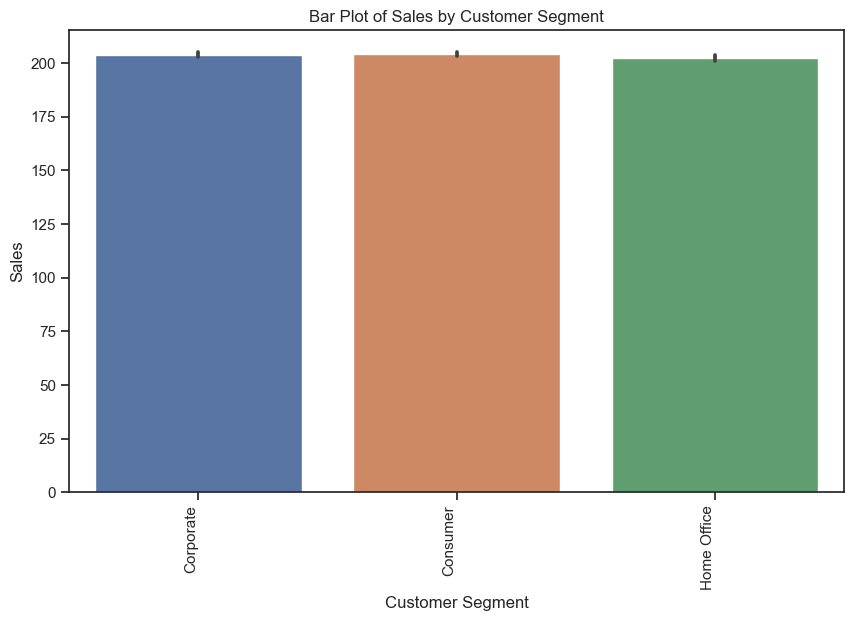

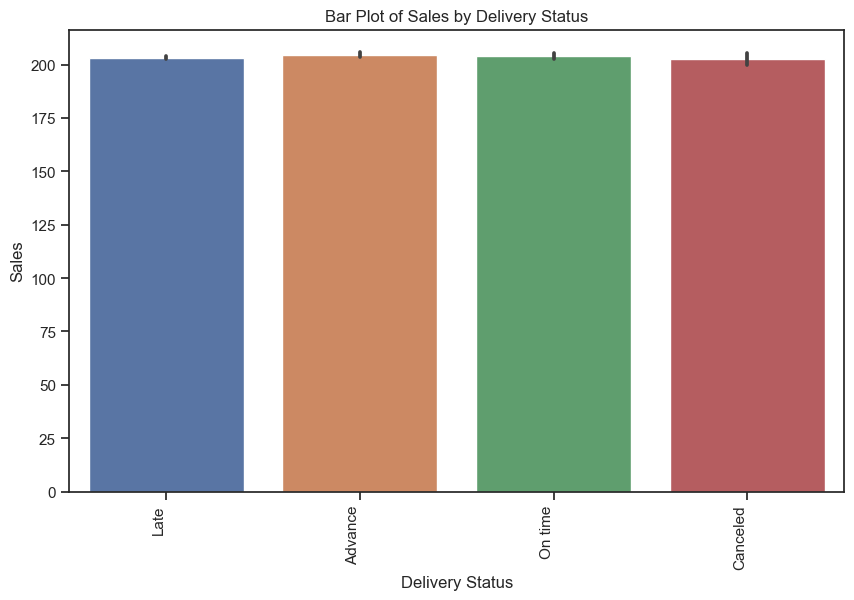

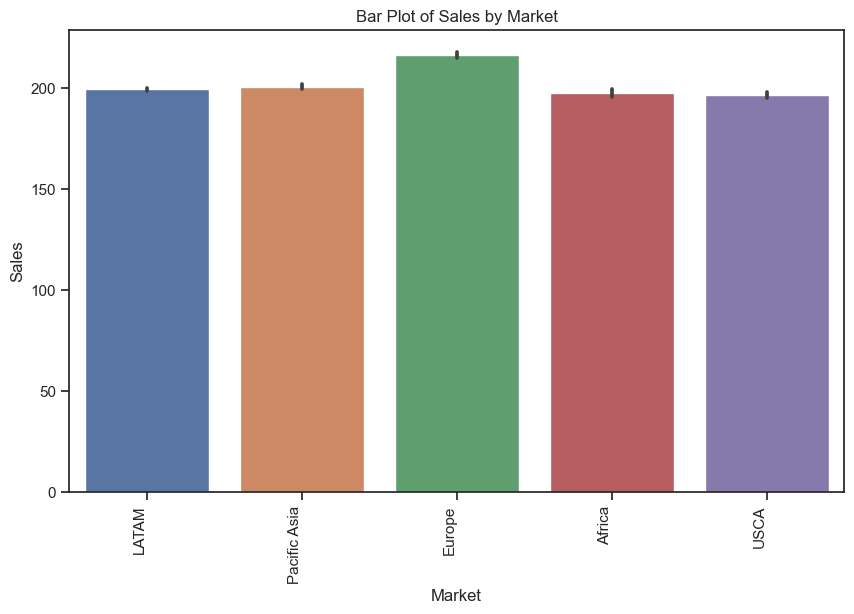

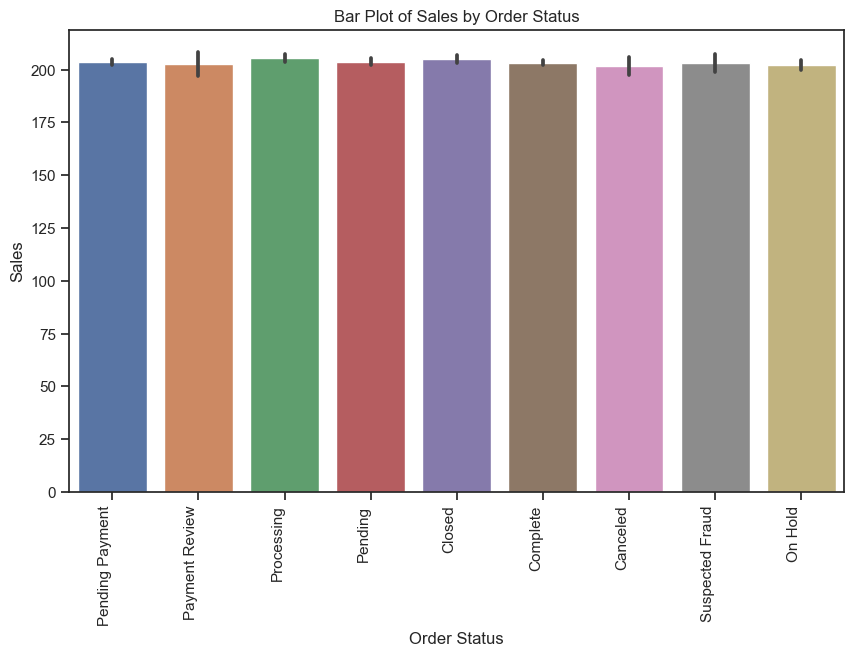

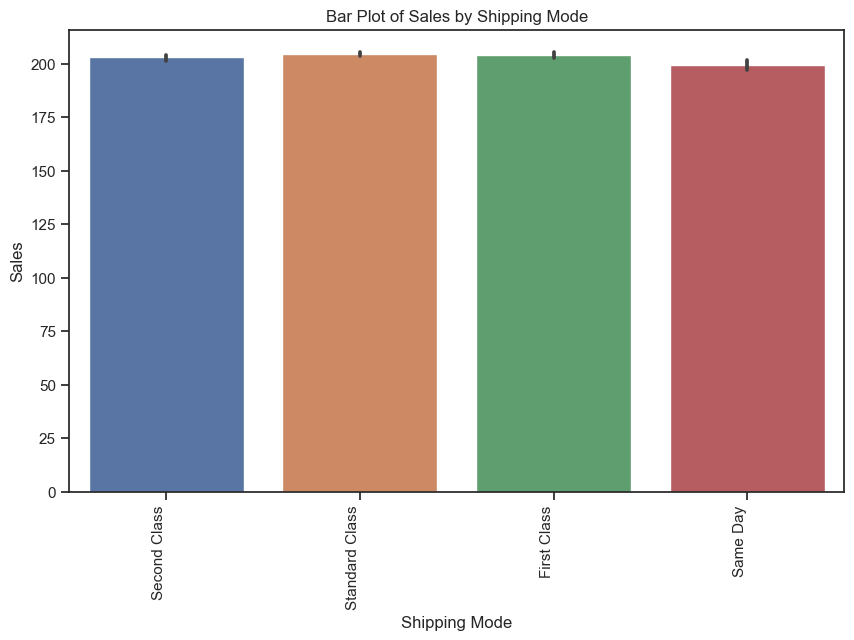

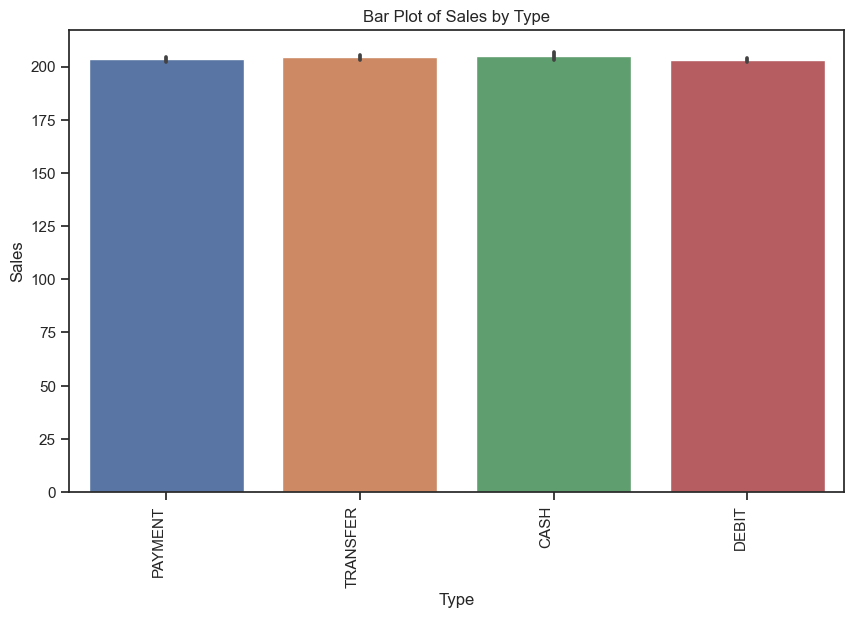

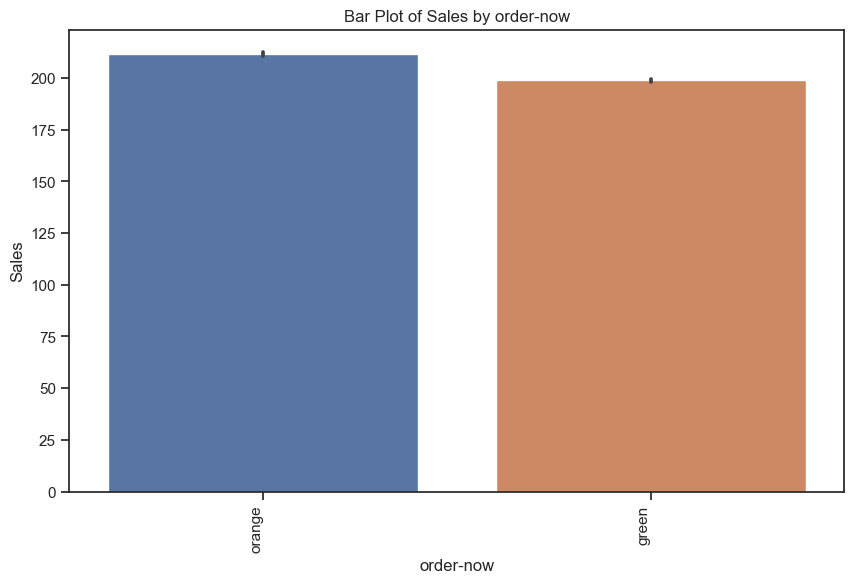

In [20]:
for i in x_axis_col:
    plt.figure(figsize=(10, 6))  
    sns.barplot(x = final_data[i],y = final_data['Sales'])
    plt.xticks(rotation=90, ha='right') 
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.title(f'Bar Plot of Sales by {i}')
    plt.show()

# 

### 			5. Find out data related issues based on the data Audit					

In [21]:
# all na values

In [22]:
final_data.loc[:,final_data.isna().sum()>0][final_data.isna().any(axis=1)]

,Customer Lname,Customer Zipcode
8568,NaN,90027.0
13891,NaN,78240.0
77105,NaN,725.0
77868,NaN,725.0
85199,Elliott,NaN
86841,NaN,28314.0
100893,NaN,91335.0
101075,NaN,96822.0
137176,NaN,60067.0
143150,Slater,NaN


In [23]:
final_data.duplicated().sum()

0

<Axes: xlabel='Sales', ylabel='Count'>

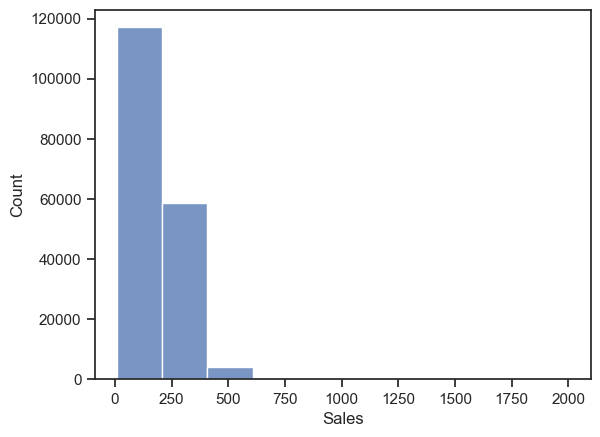

In [24]:
sns.histplot(x=final_data['Sales'],bins= 10)

<Axes: >

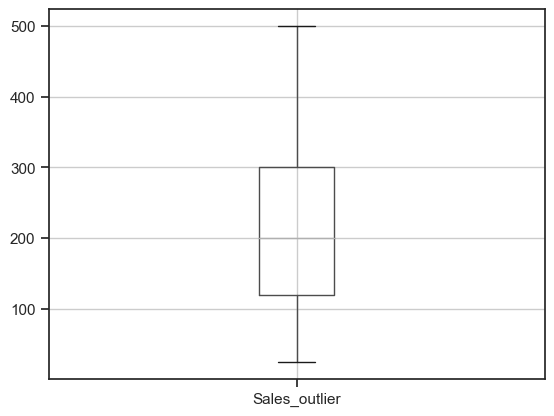

In [25]:
lc = final_data['Sales'].quantile(0.01)
uc = final_data['Sales'].quantile(0.99)

final_data['Sales_outlier'] = final_data['Sales'].clip(lower = lc, upper = uc)
final_data.boxplot(column=['Sales_outlier'])

In [26]:
# 	b. Data Preparation: (Weightage - 15%)										
# 		1. Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) (Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)									
# 		2. Rename the variables as per python naming convensions									
# 		3. Convert the variables data types as per the data descriptions									
# 		4. Impute missing values with mean for numerical variables, mode for categorical variables									
# 		5. Perform any other data preparation steps as required?									


## DATA PREPARATION

#### 		1. Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) (Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)									


In [27]:
final_data['flag'] = final_data[['Days for shipment (scheduled)','Days for shipping (real)']].apply(lambda x: 'late' if x['Days for shipping (real)']> x['Days for shipment (scheduled)'] else 'not late' ,axis=1  )

#### 		2. Rename the variables as per python naming convensions									


In [28]:
# it was giving future waring so used regx=True
final_data.columns = final_data.columns.str.replace(" ", "_",regex=True).str.replace("(", "",regex=True).str.replace(")", "",regex=True)

#### 		3. Convert the variables data types as per the data descriptions									


In [29]:
final_data[['order_date_DateOrders','shipping_date_DateOrders']].head(1)

,order_date_DateOrders,shipping_date_DateOrders
0,2/26/2017 17:17,03/02/17 17:17


In [30]:
final_data['order_date_DateOrders'] = pd.to_datetime(final_data['order_date_DateOrders'], errors='coerce')

In [31]:
final_data['shipping_date_DateOrders'] = pd.to_datetime(final_data['shipping_date_DateOrders'], errors='coerce')

#### 		4. Impute missing values with mean for numerical variables, mode for categorical variables									


In [32]:
final_data = final_data.apply(lambda x: x.fillna(x.mode()[0]))

#### 		5. Perform any other data preparation steps as required?									


In [33]:
# outlier treatment already done 
# we can encode catogorical data but it depends

In [34]:
# c. List of Analysis: (weightage - 40%)										
# 	1. Caclulate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products etc									
# 	2. Status of orders (number of orders by current status)									
# 	3. Status of Delivery of orders (number of orders by each type of delivery status)									
# 	4. Late Delivery Risk by time (by each week, month, year, quarter)									
# 	5. Order Item qty by time (by each week, month, year, quarter)									
# 	6. Sales units/value  by time (by each week, month, year, quarter)									
# 	7. Profit orders/value  by time (by each week, month, year, quarter)									
# 	8. Order profit per order  by time (by each week, month, year, quarter)									
# 	9. Order count by country/state/  by time (by each week, month, year, quarter)									
# 	10. Inventory Units by each class or cluster									
# 	11. Inventory Value by each class or cluster									
# 	12. inventory by class									
# 	13. Detail Stock Action (products to be ordered, not required to ordered)									
# 	14. Product Order qty trend  (by time (by each week, month, year, quarter))									
# 	15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)									
# 	16. Top payment methods by each product category.									
# 	17. Which shipping mode is more efficient interms of not delaying?									
# 	18. Number of orders, sales, qty  by order status									
# 	19. Which categories are most profitable categories (top5)?									
# 	20. Which categoires have been given highest average discount (top5)?									
# 	21. Any other analysis you can perform? (At least 5 additional analysis you required to work on beyond the supported questions)									
										

## c. List of Analysis: (weightage - 40%)										


#### 	1. Caclulate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products etc									


In [35]:
# total sale value
final_data['Sales'].sum()

36784735.01337984

In [36]:
# total sale unit
final_data['Order_Item_Quantity'].sum()

384079

In [37]:
# inventory value
(final_data['Product_Price'] * final_data['current_stock']).sum()

2536160997.4468727

In [38]:
# inverntory quantity
final_data['current_stock'].sum()

30378127

In [39]:
(final_data['Sales']-final_data['Product_Price']).sum()

11289576.332800735

In [40]:
# profit value
final_data['Profit_values'] = final_data['Sales'] - final_data['Product_Price']
final_data['Profit_values'].sum()

11289576.332800735

In [41]:
sales_shipment_data.columns

Index(['Product Category Id', 'Category Name', 'Class', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Delivery Status', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Id', 'Order Region', 'Order State',
       'Order Status', 'Product Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Type',
       'Benefit per order', 'Days for shipment (scheduled)',
       'Days for shipping (real)', 'Latitude', 'Longitude',
       'Order Customer Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales',
       'Sales per customer'],
      dtype='object

In [42]:
# no. of distinct products
final_data['Product_Id'].nunique()

118

In [43]:
#  distinct category 
final_data['Category_Name'].nunique()

50

In [44]:
# distinct customer id 
final_data['Customer_Id'].nunique()

20652

#### 	2. Status of orders (number of orders by current status)									


In [45]:
final_data[['Order_Id','Order_Status']].groupby(['Order_Status'])['Order_Id'].count()

Order_Status
Canceled            3692
Closed             19616
Complete           59491
On Hold             9804
Payment Review      1893
Pending            20227
Pending Payment    39832
Processing         21902
Suspected Fraud     4062
Name: Order_Id, dtype: int64

#### 	3. Status of Delivery of orders (number of orders by each type of delivery status)									


In [46]:
final_data.groupby(['Delivery_Status'])['Order_Id'].count()

Delivery_Status
Advance     41592
Canceled     7754
Late        98977
On time     32196
Name: Order_Id, dtype: int64

#### 	4. Late Delivery Risk by time (by each week, month, year, quarter)									


In [47]:
final_data['year_ship'] = final_data['shipping_date_DateOrders'].dt.year
final_data['quater_ship'] =final_data['shipping_date_DateOrders'].dt.quarter
final_data['week_ship'] =final_data['shipping_date_DateOrders'].dt.isocalendar().week
final_data['month_ship'] =final_data['shipping_date_DateOrders'].dt.month

In [48]:
a = final_data[final_data['Delivery_Status'] == 'Late']

In [49]:
def risk_by_time (arg):
    x = a.groupby(arg)['Delivery_Status'].count().reset_index(name= 'late_count')
    return(x)

In [50]:
# ('quater_ship', 'week_ship', 'year_ship', 'month_ship') select from here  
risk_by_time('quater_ship')

,quater_ship,late_count
0,1,26366
1,2,25430
2,3,26020
3,4,21161


#### 	5. Order Item qty by time (by each week, month, year, quarter)									


In [51]:
'quater_ship' , 'week_ship' , 'year_ship' , 'month_ship'

('quater_ship', 'week_ship', 'year_ship', 'month_ship')

In [52]:
def order_item_by_time (arg):
    x = final_data.groupby(arg)['Order_Item_Quantity'].count().reset_index()
    return(x)

In [53]:
# ('quater_ship', 'week_ship', 'year_ship', 'month_ship') select from here  
order_item_by_time('quater_ship')

,quater_ship,Order_Item_Quantity
0,1,48121
1,2,46576
2,3,47282
3,4,38540


#### 	6. Sales units/value  by time (by each week, month, year, quarter)									


In [54]:
def Sales_value_by_time (arg):
    x = final_data.groupby(arg)['Sales'].sum().reset_index()
    return(x)

In [55]:
# ('quater_ship', 'week_ship', 'year_ship', 'month_ship') select from here  
Sales_value_by_time('quater_ship')

,quater_ship,Sales
0,1,9.449611e+06
1,2,9.294201e+06
2,3,9.503587e+06
3,4,8.537336e+06


#### 	7. Profit orders/value  by time (by each week, month, year, quarter)									


In [56]:
def Profit_value_by_time (arg):
    x = final_data.groupby(arg)['Profit_values'].sum().reset_index()
    return(x)

In [57]:
# ('quater_ship', 'week_ship', 'year_ship', 'month_ship') select from here  
Profit_value_by_time('quater_ship')

,quater_ship,Profit_values
0,1,3.021386e+06
1,2,3.036234e+06
2,3,3.089578e+06
3,4,2.142378e+06


#### 	8. Order profit per order  by time (by each week, month, year, quarter)									


In [58]:
def Order_profit_per_order_by_time (arg):
    x = final_data.groupby(arg)['Order_Profit_Per_Order'].sum().reset_index()
    return(x)

In [59]:
# ('quater_ship', 'week_ship', 'year_ship', 'month_ship') select from here  
Order_profit_per_order_by_time('quater_ship')

,quater_ship,Order_Profit_Per_Order
0,1,9.935239e+05
1,2,1.008819e+06
2,3,1.059003e+06
3,4,9.055574e+05


#### 	9. Order count by country/state/  by time (by each week, month, year, quarter)									


In [60]:
final_data.groupby(['Customer_Country','month_ship'])['Order_Item_Quantity'].sum().reset_index()
final_data.groupby(['Customer_Country','week_ship'])['Order_Item_Quantity'].sum().reset_index()
final_data.groupby(['Customer_Country','year_ship'])['Order_Item_Quantity'].sum().reset_index()
final_data.groupby(['Customer_Country','quater_ship'])['Order_Item_Quantity'].sum().reset_index()

,Customer_Country,quater_ship,Order_Item_Quantity
0,EE. UU.,1,63837
1,EE. UU.,2,61701
2,EE. UU.,3,62626
3,EE. UU.,4,47961
4,Puerto Rico,1,39528
5,Puerto Rico,2,39149
6,Puerto Rico,3,39479
7,Puerto Rico,4,29798


#### 	10. Inventory Units by each class or cluster									


In [61]:
a = inventory_stock_data.merge(sales_shipment_data,left_on='product id',right_on='Product Id',how='inner')
aa = a[['Class','current stock','product id']].drop_duplicates()
aa.groupby('Class')['current stock'].sum().reset_index()

,Class,current stock
0,High Value-Small Number,748
1,Moderate Value-Moderate Number,301
2,Small Value-Large Number,17916


#### 	11. Inventory Value by each class or cluster									


In [62]:
b = a[['Class','product id','Product Id','Sales']].drop_duplicates()
b.groupby('Class')['Sales'].sum().reset_index()

,Class,Sales
0,High Value-Small Number,3099.660046
1,Moderate Value-Moderate Number,1079.980011
2,Small Value-Large Number,57952.830061


#### 	12. inventory by class									


In [63]:
c = a[['current stock','Class','product id','Product Id']].drop_duplicates()
c.groupby(['Class'])['current stock'].count().reset_index()

,Class,current stock
0,High Value-Small Number,4
1,Moderate Value-Moderate Number,3
2,Small Value-Large Number,111


#### 	13. Detail Stock Action (products to be ordered, not required to ordered)									


In [64]:
final_data['stock_action']=np.where(final_data['current_stock'] > final_data['safety_stock'], 'products_to_be_ordered', 'Not_required')

#### 	14. Product Order qty trend  (by time (by each week, month, year, quarter))									


In [65]:
final_data.groupby(['quater_ship'])['Order_Item_Quantity'].sum()

quater_ship
1    103365
2    100850
3    102105
4     77759
Name: Order_Item_Quantity, dtype: int64

#### 	15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)									


In [66]:
# top 10 categories name
#final_data.groupby(['Category_Name'])[['Sales','Order_Item_Quantity']].sum().sort_values(by=['Sales', 'Order_Item_Quantity'], ascending=False).reset_index().head()

In [67]:
# top 10 products name
# final_data.groupby(['Product_Name'])[['Sales','Order_Item_Quantity']].sum().sort_values(by=['Sales', 'Order_Item_Quantity'], ascending=False).reset_index()

In [68]:
#  top 10 cites revenue
city_revenue = final_data.groupby('Order_City')['Sales'].sum().reset_index(name='Total_Revenue')
city_revenue_sorted = city_revenue.sort_values(by='Total_Revenue', ascending=False).head(10)
city_revenue_sorted

,Order_City,Total_Revenue
2256,New York City,436061.538159
2872,Santo Domingo,432351.878303
1876,Los Angeles,370545.137497
3139,Tegucigalpa,364129.987113
1958,Managua,335424.756486
2075,Mexico City,298471.835883
1964,Manila,271819.805030
2806,San Francisco,256245.625345
2469,Philadelphia,255914.244948
1861,London,255151.244618


#### 	16. Top payment methods by each product category.									


In [69]:
final_data.groupby('Product_Category_Id')['Type'].apply(lambda x: x.value_counts().sort_values(ascending=False).head(1)).reset_index(name='Top_Payment_Method')

,Product_Category_Id,level_1,Top_Payment_Method
0,2,DEBIT,61
1,3,DEBIT,235
2,4,TRANSFER,25
3,5,DEBIT,125
4,6,DEBIT,115
5,7,DEBIT,242
6,9,DEBIT,4766
7,10,DEBIT,54
8,11,DEBIT,121
9,12,DEBIT,154


#### 	17. Which shipping mode is more efficient interms of not delaying?									


In [70]:
final_data['delayed'] = final_data.apply(lambda x: 1 if x['Days_for_shipping_real'] > 0 else 0, axis=1)
final_data['delayed'].mean()
final_data.groupby('Shipping_Mode') ['delayed'].mean().reset_index(name= 'ship_delay').sort_values(by= 'ship_delay')

,Shipping_Mode,ship_delay
1,Same Day,0.478279
0,First Class,1.000000
2,Second Class,1.000000
3,Standard Class,1.000000


#### 	18. Number of orders, sales, qty  by order status									


In [71]:
final_data.groupby('Order_Status').agg(Total_Orders=('Order_Id', 'count'),Total_Sales=('Sales', 'sum'),Total_Quantity=('Order_Item_Quantity', 'sum')).reset_index()

,Order_Status,Total_Orders,Total_Sales,Total_Quantity
0,Canceled,3692,7.443704e+05,7875
1,Closed,19616,4.022624e+06,41458
2,Complete,59491,1.209531e+07,126624
3,On Hold,9804,1.981543e+06,20845
4,Payment Review,1893,3.836537e+05,4109
5,Pending,20227,4.120533e+06,43196
6,Pending Payment,39832,8.106698e+06,84736
7,Processing,21902,4.504064e+06,46623
8,Suspected Fraud,4062,8.259350e+05,8613


#### 	19. Which categories are most profitable categories (top5)?									


In [72]:
final_data.groupby('Category_Name')['Profit_values'].sum().reset_index(name='total_profit').sort_values(by= 'total_profit', ascending=False).head(5)

,Category_Name,total_profit
12,Cleats,2.950488e+06
10,Cardio Equipment,2.468525e+06
47,Women's Apparel,2.096050e+06
30,Indoor/Outdoor Games,1.924480e+06
38,Shop By Sport,8.632288e+05


#### 	20. Which categoires have been given highest average discount (top5)?									

In [73]:
final_data[['Order_Item_Discount','Category_Name']].groupby('Category_Name')['Order_Item_Discount'].mean().reset_index(name= 'highest_discount').sort_values(by='highest_discount', ascending= False).head(5)

,Category_Name,highest_discount
13,Computers,152.952489
41,Strength Training,54.790270
20,Garden,53.726280
15,Crafts,46.800517
8,Cameras,45.795609


#### d. Create visualizations of the analysis (as per Sample reports provided - you need to create only charts and dashboard is optional) (Weightage - 15%)											
		1. Sample report & metrics provided as reference. However, you can come up with your own charts/visualizations as required. You can come up with the codes to replicate the charts/visualizations.										
		2. The data used for the sample reports is different than the data provided for this case study so the numbers may not be same										
		3. Any other visualizaitons (at least 2) you can create beyond visualizaitons mentioned in the sample reports & metrics?										


In [74]:
f = final_data['Delivery_Status'].value_counts()
f

Late        98977
Advance     41592
On time     32196
Canceled     7754
Name: Delivery_Status, dtype: int64

Text(0.5, 1.0, 'Delivery Status Distribution')

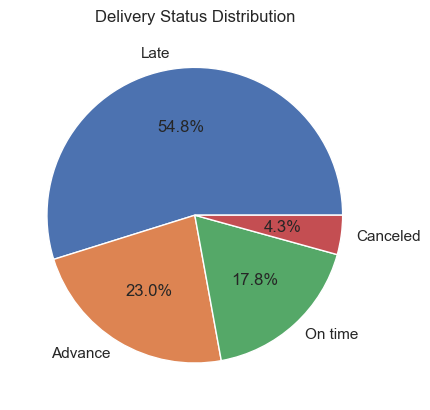

In [75]:
plt.pie(f, labels=f.index, autopct='%1.1f%%')
plt.title('Delivery Status Distribution')

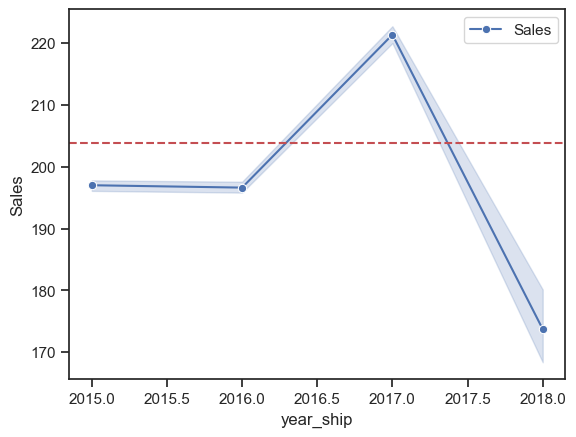

In [76]:
sns.lineplot(data=final_data, x='year_ship', y='Sales', marker='o', label='Sales')
# sns.barplot(data=final_data,x='year_ship',y='Sales')
plt.axhline(y=final_data['Sales'].mean(), color='r', linestyle='--', label='Average Sales')

## e. Predictive modeling & perform the tasks as per your understanding (Weightage: 20%)											
	1. Build predictive model to predict the sales (Hint: You are required to aggregate the data at customer level. It means that one record for one customer)										
	2. Prepare end to end code with proper comments										
	3. Derive insights as per the models										


In [77]:
obj = final_data.select_dtypes(include='object')
num = final_data.select_dtypes(exclude='object')

In [78]:
a = final_data[['Order_Item_Discount_Rate','avg_order_qty','year_ship','Order_Profit_Per_Order','Order_Item_Quantity','Order_Item_Total','Order_Profit_Per_Order','Sales_per_customer','avg_lead_time', 'avg_order_qty','Profit_values']]

In [79]:
b = pd.get_dummies(final_data.loc[:,['Class','Delivery_Status','Order_Status','Type','Customer_State','Customer_Country']],drop_first=True)

In [80]:
x_variable = pd.concat([b,a],axis=1)

In [81]:
y_variable = final_data['Sales_outlier']

In [82]:
df_for_model = pd.concat([x_variable,y_variable],axis=1)
df_for_model.columns = df_for_model.columns.str.replace(' ','_').str.replace('-','_')

In [83]:
train,test = train_test_split(df_for_model, test_size=0.2,random_state=42)

In [84]:
test.to_csv('file1.csv')

In [85]:
abc = x_variable.columns
abc = abc.str.replace('-','_').str.replace(' ','_')

In [86]:
formula = 'Sales_outlier ~ ' + ' + '.join(abc)
formula

'Sales_outlier ~ Class_Moderate_Value_Moderate_Number + Class_Small_Value_Large_Number + Delivery_Status_Canceled + Delivery_Status_Late + Delivery_Status_On_time + Order_Status_Closed + Order_Status_Complete + Order_Status_On_Hold + Order_Status_Payment_Review + Order_Status_Pending + Order_Status_Pending_Payment + Order_Status_Processing + Order_Status_Suspected_Fraud + Type_DEBIT + Type_PAYMENT + Type_TRANSFER + Customer_State_95758 + Customer_State_AL + Customer_State_AR + Customer_State_AZ + Customer_State_CA + Customer_State_CO + Customer_State_CT + Customer_State_DC + Customer_State_DE + Customer_State_FL + Customer_State_GA + Customer_State_HI + Customer_State_IA + Customer_State_ID + Customer_State_IL + Customer_State_IN + Customer_State_KS + Customer_State_KY + Customer_State_LA + Customer_State_MA + Customer_State_MD + Customer_State_MI + Customer_State_MN + Customer_State_MO + Customer_State_MT + Customer_State_NC + Customer_State_ND + Customer_State_NJ + Customer_State_NM 

In [87]:
model = smf.ols(formula=formula,data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Sales_outlier   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 2.343e+04
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:06:04   Log-Likelihood:            -7.1429e+05
No. Observations:              144415   AIC:                         1.429e+06
Df Residuals:                  144350   BIC:                         1.429e+06
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [88]:
mse_train = mean_squared_error(train['Sales_outlier'], model.predict(train))
mse_test = mean_squared_error(test['Sales_outlier'], model.predict(test))

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"mse for train : {mse_train}")
print(f"mse for test: {mse_test}")

print(f"\nrmse for train : {rmse_train}")
print(f"rmse for test: {rmse_test}")


mse for train : 1157.8853969605161
mse for test: 1149.6914001276957

rmse for train : 34.0277151298837
rmse for test: 33.907099553451864


In [93]:
plt.scatter(x_variable)

TypeError: scatter() missing 1 required positional argument: 'y'

In [91]:
final_obj.columns

Index(['Category Name', 'Class', 'Customer City', 'Customer Country',
       'Customer Fname', 'Customer Lname', 'Customer Segment',
       'Customer State', 'Customer Street', 'Delivery Status',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'shipping date (DateOrders)',
       'Shipping Mode', 'Type', 'order-now', 'product name'],
      dtype='object')

In [ ]:
a = final_data.groupby(['Customer_Id','Sales'])[['Type','Delivery_Status']].agg(lambda x: x.mode()[0]).reset_index()
a

In [119]:
final_data.groupby(['Customer_Id']).agg({'Type':'first'})

,Type
Customer_Id,
1,DEBIT
2,DEBIT
3,DEBIT
4,CASH
5,PAYMENT
...,...
20753,TRANSFER
20754,DEBIT
20755,DEBIT


In [123]:
final_data[['Delivery_Status','Customer_Id']][final_data['Customer_Id']==2]

,Delivery_Status,Customer_Id
20135,On time,2
20543,On time,2
55602,On time,2
83577,On time,2
83592,On time,2
83793,Advance,2
85465,On time,2
109333,Late,2
151210,Late,2
159573,Late,2
